In [34]:
import pandas as pd
gdas_data = pd.read_csv("data/Stanica IPH/GDAS_2017_2019_IPH.csv")
gdas_data = gdas_data.dropna()
gdas_data['Date']= pd.to_datetime(gdas_data['Date'])
gdas_data.t02m -= 273.15  # convert to Celsius

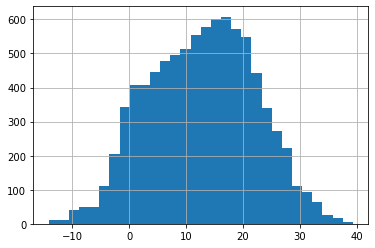

In [35]:
hist = gdas_data.t02m.hist(bins=30)

In [36]:
import datetime
start_date = datetime.datetime(2019,6,11)
end_date  = datetime.datetime(2019,9,11)
mask = (gdas_data['Date'] > start_date) & (gdas_data['Date'] <= end_date)

deo = gdas_data.loc[mask]

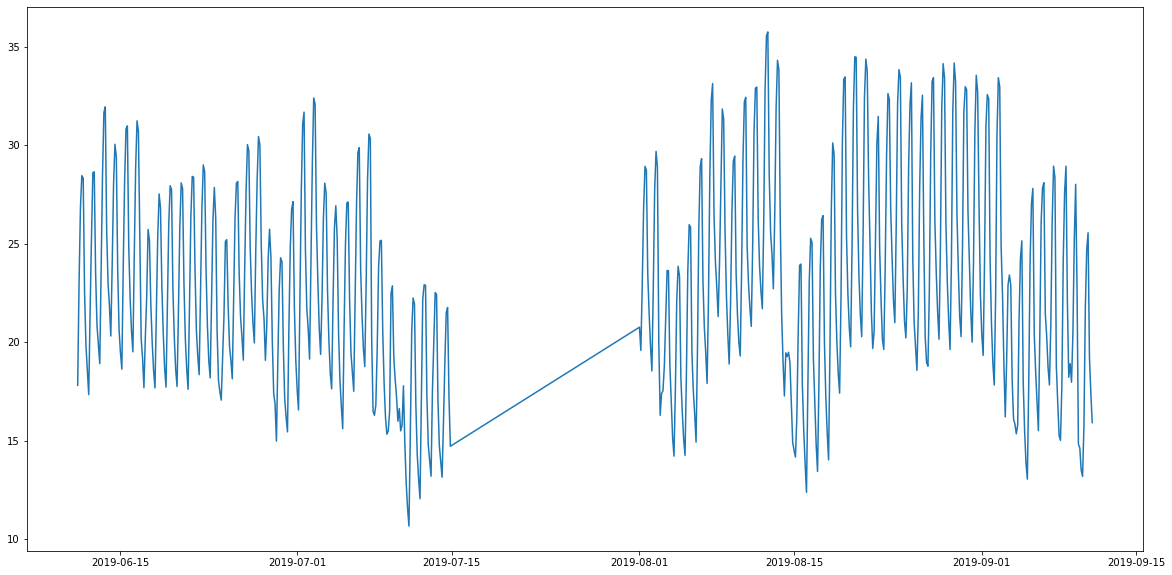

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(deo.Date, deo.t02m)

plt.show()

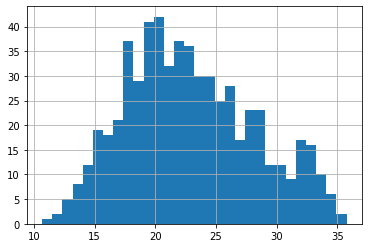

In [38]:
hist = deo.t02m.hist(bins=30)

In [39]:
deo.t02m.std()

5.271414519663492

In [40]:
deo.t02m.mean()

22.872116666666688

<ipython-input-41-8bc949aa78bd>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  deo.delta = (deo.Date - deo.Date.min())  / np.timedelta64(1,'D')


<AxesSubplot:>

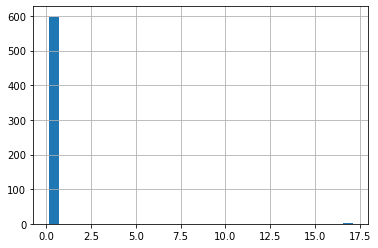

In [41]:
deo.delta = (deo.Date - deo.Date.min())  / np.timedelta64(1,'D')

deo.delta.diff().hist(bins=30)


In [42]:
deo = deo.resample('D', on="Date").mean()
deo.srednja_temp = deo.t02m.interpolate(method="cubic")


<ipython-input-42-4b804dce6176>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  deo.srednja_temp = deo.t02m.interpolate(method="cubic")


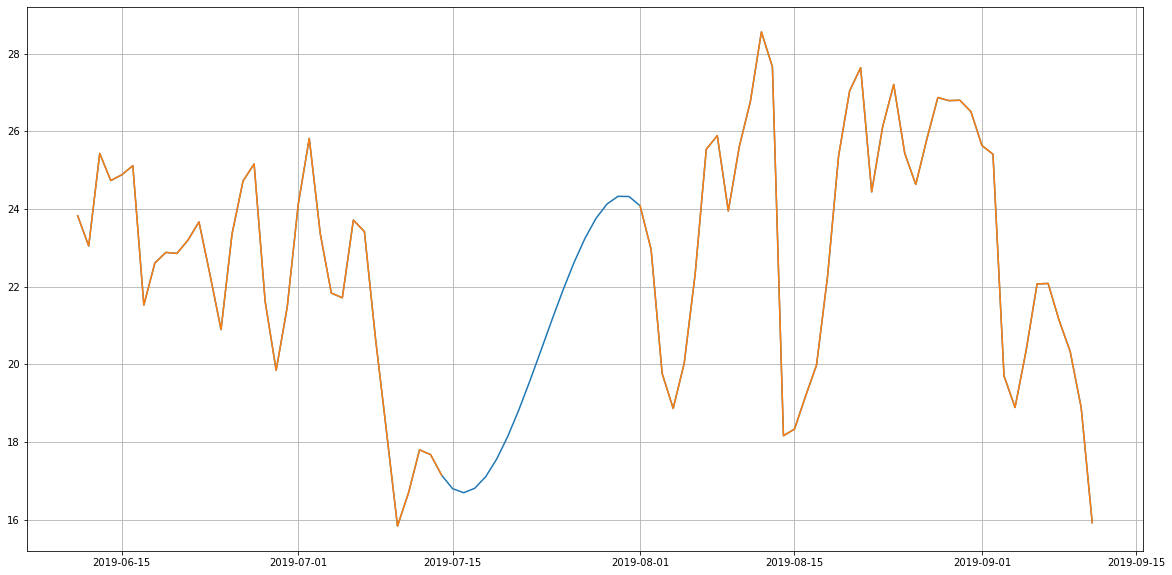

In [44]:
plt.figure(figsize=(20,10))
plt.plot(deo.index, deo.srednja_temp)
plt.plot(deo.index, deo.t02m)
plt.grid()
plt.show()